In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Exercises 1
E1=(2.75+3.69*1j)*(8.55-6.13*1j)
print('E1 = ', E1)

E2=1.4*numpy.exp(5.32*1j)
print('E2 = ', E2)

E3=(7.51-9.15*1j)/(4.43+9.64*1j)
print('E3 = ', E3)

E1 =  (46.1322+14.692000000000004j)
E2 =  (0.799270785858-1.1494199454j)
E3 =  (-0.4880897698448308-1.0033441577191493j)


In [11]:
#Ecercises definition fuctions
def get_xi_shape(R,c,x_c,y_c):
    N=666
    theta=numpy.linspace(0,2*math.pi,N)
    z=(R*numpy.cos(theta)+x_c)+(R*numpy.sin(theta)+y_c)*1j
    xi=z+c**2/z
    x_xi_shape=xi.real
    y_xi_shape=xi.imag
    return x_xi_shape,y_xi_shape
def get_Joukowski_transformation(x_z,y_z,c):
    z_xi=x_z+y_z*1j
    Z_xi=z_xi+c**2/z_xi
    x_xi=Z_xi.real
    y_xi=Z_xi.imag
    return x_xi,y_xi

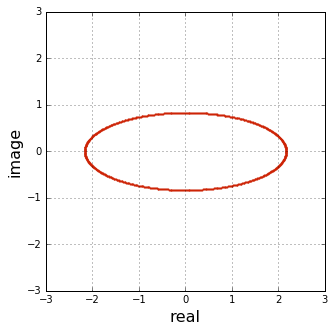

In [12]:
#Ecercises 2.1
c=1
R=1.5
x_c,y_c=0,0
x_xi_shape,y_xi_shape=get_xi_shape(R,c,x_c,y_c)
pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(x_xi_shape,y_xi_shape,color='#CD2305', s=1, marker='o');

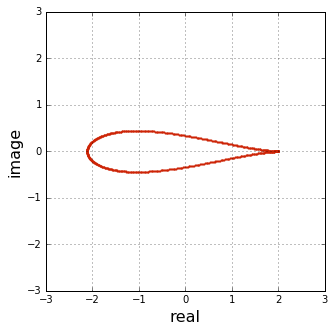

In [13]:
#Ecercises 2.2
c=1
R=1.2
x_c,y_c=c-R,0
x_xi_shape,y_xi_shape=get_xi_shape(R,c,x_c,y_c)
pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(x_xi_shape,y_xi_shape,color='#CD2305', s=1, marker='o');

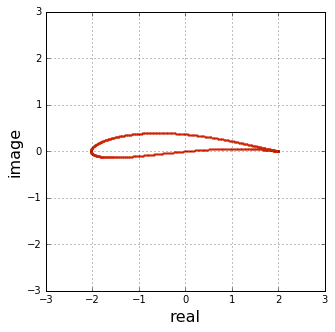

In [14]:
#Ecercises 2.3
x_c,y_c=-0.1,0.1
c=1
R=numpy.sqrt((c-x_c)**2+y_c**2)
x_xi_shape,y_xi_shape=get_xi_shape(R,c,x_c,y_c)
pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(x_xi_shape,y_xi_shape,color='#CD2305', s=1, marker='o');

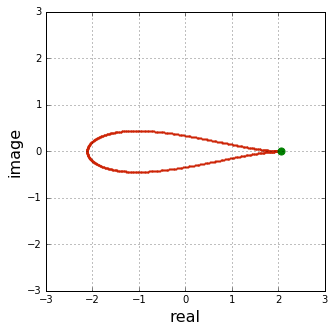

In [56]:
#Ecercises 2.4
c=1
R=1.2
x_c,y_c=c-R,0
x_xi_shape,y_xi_shape=get_xi_shape(R,c,x_c,y_c)
pyplot.figure(figsize=(5,5))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(x_xi_shape,y_xi_shape,color='#CD2305', s=1, marker='o');

#find the point of trailing edge
theta_trail= 0
a=numpy.cos(theta_trail)+x_c
b=numpy.sin(theta_trail)+y_c
z=a+b*1j
Z=z+1/z
x_trail=Z.real
y_trail=Z.imag
pyplot.scatter(x_trail,y_trail,color='g',s=50,marker='o');
# From the plot we can see the green point is the trail point 
# When theta is 0,the point corresponds to the trailing edge of the airfoil 

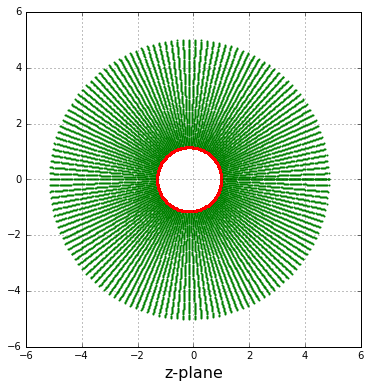

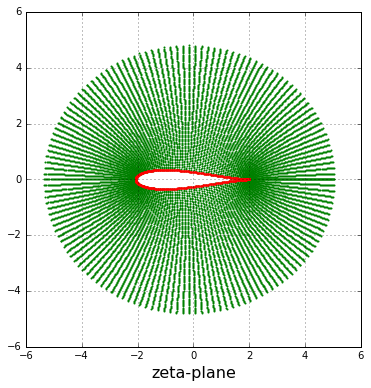

In [57]:
# Exercise 3 Grid points on the z-plane and xi-plane
x_c,y_c=-0.15,0
R=1.15
c=1
N_r=100
N_theta=145
r=numpy.linspace(R,5,N_r)
theta=numpy.linspace(0,2*math.pi,N_theta)
r_grid,theta_grid=numpy.meshgrid(r,theta)
x_z=r_grid*numpy.cos(theta_grid)+x_c
y_z=r_grid*numpy.sin(theta_grid)+y_c
x_shape,y_shape=(R*numpy.cos(theta_grid)+x_c),(R*numpy.sin(theta_grid)+y_c)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('z-plane',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x_z,y_z,color='g', s=1, marker='o');
pyplot.scatter(x_shape,y_shape,color='r', s=1, marker='o');

#get the plot in ξ-plane
x_xi,y_xi=get_Joukowski_transformation(x_z,y_z,c)
x_shape,y_shape=get_xi_shape(R,c,x_c,y_c)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('zeta-plane',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x_xi,y_xi,color='g', s=1, marker='o');
pyplot.scatter(x_shape,y_shape,color='r', s=1, marker='o');

In [58]:
# Exercise 4 define functions
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

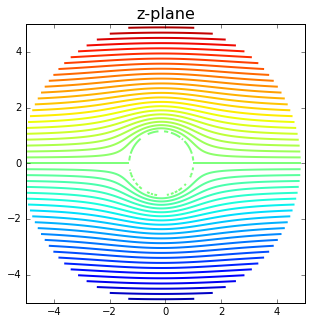

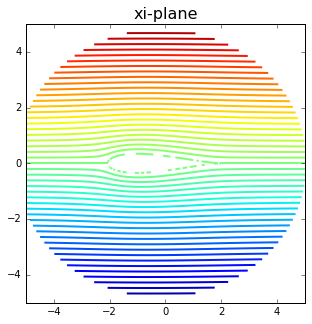

In [59]:
# Exercise 4 Stream function and streamlines
x_c, y_c, R, c=-0.15, 0, 1.15, 1
N_r, N_theta=100,145
r=numpy.linspace(R,5,N_r)
theta=numpy.linspace(0,2*math.pi,N_theta)
r_grid,theta_grid=numpy.meshgrid(r,theta)
X=r_grid*numpy.cos(theta_grid)+x_c
Y=r_grid*numpy.sin(theta_grid)+y_c
xd=x_c
yd=y_c

#calculate  stream fucntion 
u_inf=1
strength= R**2*2*math.pi*u_inf
psi_freestream= u_inf * Y
psi_d=get_stream_function_doublet(strength, xd, yd, X, Y)
psi=psi_d+psi_freestream

#plot the z-plane
pyplot.figure(figsize=(5,5))
pyplot.title('z-plane',fontsize=16)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi,levels = numpy.linspace(-5,5,51),\
               linewidths=2,linestyles='solid');


#plot the xi-plane
X_xi,Y_xi=get_Joukowski_transformation(x_z,y_z,c)
pyplot.figure(figsize=(5,5))
pyplot.title('xi-plane',fontsize=16)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X_xi,Y_xi,psi,levels = numpy.linspace(-5,5,51),\
               linewidths=2,linestyles='solid');

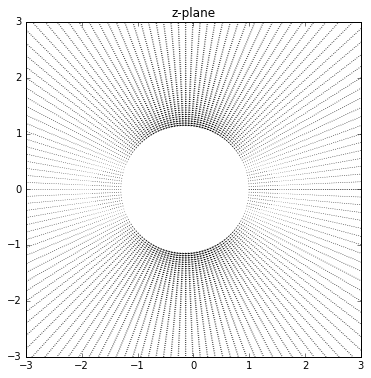

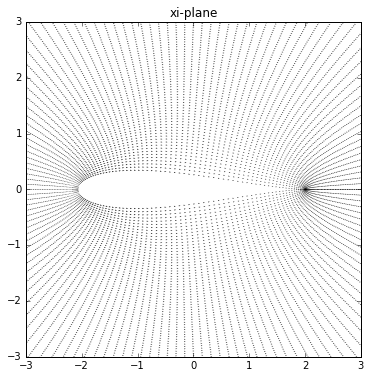

In [20]:
# Exercise 4 Velocity vectors 
strength= R**2*2*math.pi*u_inf
u_freestream = u_inf * numpy.ones_like(X)
v_freestream = numpy.zeros_like(X)
u_d,v_d = get_velocity_doublet(strength, xd, yd, X, Y)
u=u_d+u_freestream
v=v_d+v_freestream

# plot the z-plane
pyplot.figure(figsize=(6,6))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(X, Y, u, v);
pyplot.title('z-plane');

# plot the xi-plane
w_xi=(u-v*1j)/(1-(c/(X+Y*1j))**2)
u_xi=w_xi.real
v_xi=-w_xi.imag
pyplot.figure(figsize=(6,6))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(X_xi, Y_xi, u_xi, v_xi);
pyplot.title('xi-plane');

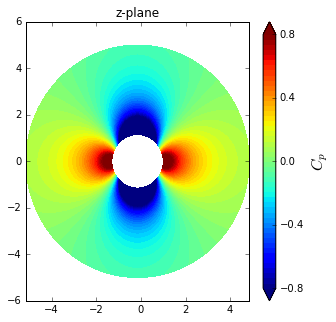

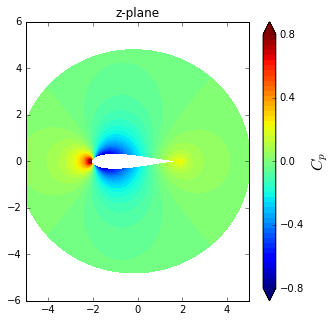

In [21]:
# Exercise 4 pressure coefficients
#plot the z-plane
cp = 1.0 - (u**2+v**2)/u_inf**2
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5+x_c,5+x_c)
pyplot.ylim(-6+y_c,6+y_c)
contf = pyplot.contourf(X, Y, cp, levels = numpy.linspace(-0.8,0.8,51),\
                        extend='both')
pyplot.title('z-plane')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.8,-0.4,0,0.4,0.8])

#plot the xi-plane
cp_xi = 1.0 - (u_xi**2+v_xi**2)/(u_inf**2)
pyplot.figure(figsize=(5,5))
pyplot.xlim(-5,5)
pyplot.ylim(-6,6)
contf = pyplot.contourf(X_xi, Y_xi, cp_xi, levels = numpy.linspace(-0.8,0.8,51),\
                        extend='both')
pyplot.title('z-plane')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.8,-0.4,0,0.4,0.8])

In [22]:
# Exercise 4
print('strength=',strength)
print('u_xi =',u_xi[61,0])
print('v_xi =',v_xi[61,0])
print('cp_xi',numpy.min(cp_xi))

strength= 8.309512568745001
u_xi = 1.10633846629
v_xi = 0.523633349298
cp_xi -0.687755674092


In [62]:
# Exercise 5 define fuctions


def get_stream_function_doublet_2(strength, xd_2, yd_2, X_2, Y_2):
    psi =  -strength/(2*math.pi)*(Y_2-yd_2)/((X_2-xd_2)**2+(Y_2-yd_2)**2)
    return psi

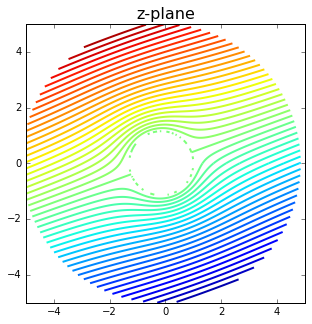

In [63]:
# Exercise 5
AoA=20/180*math.pi
X_2=(X-x_c)*numpy.cos(AoA)+(Y-y_c)*numpy.sin(AoA)
Y_2=-(X-x_c)*numpy.sin(AoA)+(Y-y_c)*numpy.cos(AoA)
xd_2,yd_2=0,0

#calculate  stream fucntion 
u_inf_2=1
psi_freestream_2= u_inf_2 * Y_2

strength= R**2*2*math.pi*u_inf_2
psi_d=get_stream_function_doublet_2(strength, xd_2, yd_2, X_2, Y_2)
psi=psi_d+psi_freestream_2

#plot the z-plane
pyplot.figure(figsize=(5,5))
pyplot.title('z-plane',fontsize=16)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.contour(X,Y,psi,levels = numpy.linspace(-5,5,51),\
               linewidths=2,linestyles='solid');



In [46]:
X_2[10,10]

-1.5330329520634083

In [47]:
Y_2[10,10]

-0.13412300411722966